# Exploratory Data Analysis

The main objectives for this notebook are:
- Perform univariate analysis
- Investigate the relationships between features
- Highlight insights that can inform the stakeholders' decisions
- Go through the next steps that will be used in feature engineering and machine learning

In [103]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [104]:
data = pd.read_csv('../data/coffee_cleaned.csv')
data.head()

,transaction_date,store_location,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour
0,2023-01-01,Lower Manhattan,2,3.0,6.0,Coffee,Gourmet brewed coffee,Ethiopia,Regular,January,Sunday,7
1,2023-01-01,Lower Manhattan,2,3.1,6.2,Tea,Brewed Chai tea,Spicy Eye Opener Chai,Large,January,Sunday,7
2,2023-01-01,Lower Manhattan,2,4.5,9.0,Drinking Chocolate,Hot chocolate,Dark chocolate,Large,January,Sunday,7
3,2023-01-01,Lower Manhattan,1,2.0,2.0,Coffee,Drip coffee,Our Old Time Diner Blend,Small,January,Sunday,7
4,2023-01-01,Lower Manhattan,2,3.1,6.2,Tea,Brewed Chai tea,Spicy Eye Opener Chai,Large,January,Sunday,7


In [105]:
data.shape

(149116, 12)

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_date  149116 non-null  object 
 1   store_location    149116 non-null  object 
 2   transaction_qty   149116 non-null  int64  
 3   unit_price        149116 non-null  float64
 4   Total_Bill        149116 non-null  float64
 5   product_category  149116 non-null  object 
 6   product_type      149116 non-null  object 
 7   product_detail    149116 non-null  object 
 8   Size              149116 non-null  object 
 9   Month Name        149116 non-null  object 
 10  Day Name          149116 non-null  object 
 11  Hour              149116 non-null  int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 13.7+ MB


In [107]:
data.isna().sum()

transaction_date    0
store_location      0
transaction_qty     0
unit_price          0
Total_Bill          0
product_category    0
product_type        0
product_detail      0
Size                0
Month Name          0
Day Name            0
Hour                0
dtype: int64

## Sales and purchases (number of transactions)

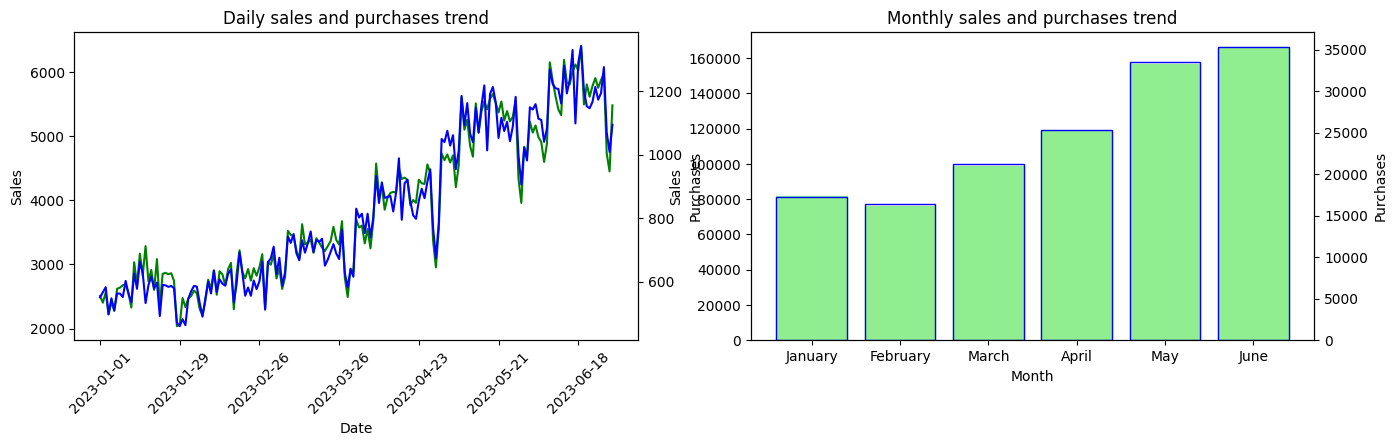

In [112]:
daily_sales = data.groupby('transaction_date')['Total_Bill'].sum()
daily_purchase = data.groupby(data['transaction_date']).size()

monthly_sales = data.groupby('Month Name')['Total_Bill'].sum()
monthly_sales = monthly_sales.reindex(index=['January', 'February', 'March', 'April', 'May', 'June'])
monthly_purchase = data.groupby(data['Month Name']).size()
monthly_purchase = monthly_purchase.reindex(index=['January', 'February', 'March', 'April', 'May', 'June'])

# Plotting the trends

fig, (ax0, ax2) = plt.subplots(1, 2, figsize=(16,4))
ax1 = ax0.twinx()
ax0.plot(daily_sales.index.values, daily_sales, color='green')
ax1.plot(daily_purchase.index.values, daily_purchase, color='blue')

# Formatting x-axis labels for daily data
ax0.set_xticks(ax0.get_xticks()[::28])  # Show only every 7th label (weekly)
ax0.xaxis.set_tick_params(rotation=45)  # Rotate and adjust size for readability
ax0.set_xlabel('Date')
ax0.set_ylabel('Sales')
ax1.set_ylabel('Purchases')
ax0.set_title('Daily sales and purchases trend')

ax3 = ax2.twinx()
ax2.bar(monthly_sales.index.values, monthly_sales, color='lightgreen', edgecolor='lightgreen')
ax3.bar(monthly_purchase.index.values, monthly_purchase, color='none', edgecolor='blue')

ax2.set_xlabel('Month')
ax2.set_ylabel('Sales')
ax3.set_ylabel('Purchases')
ax2.set_title('Monthly sales and purchases trend')

plt.title
plt.show()

### Insights
1. **Daily Sales Trend**: The fluctuations in sales and purchases may have been affected by days of the week, holidays, or marketing promotions. However, because we are working with a fictional dataset, we cannot identify which dates are holidays and how sales are affected. Over the provided period, the sales have found an increase.
2. **Monthly Sales Trend**: The collected data spans for 6 months, where some months are more sales productive than others. More data across several years might provide a better insight on how seasonality affects sales and purchases.
3. 

## Distribution of product categories

0.020054086818669277
0.7413018137734881


(array([], dtype=float64), [])

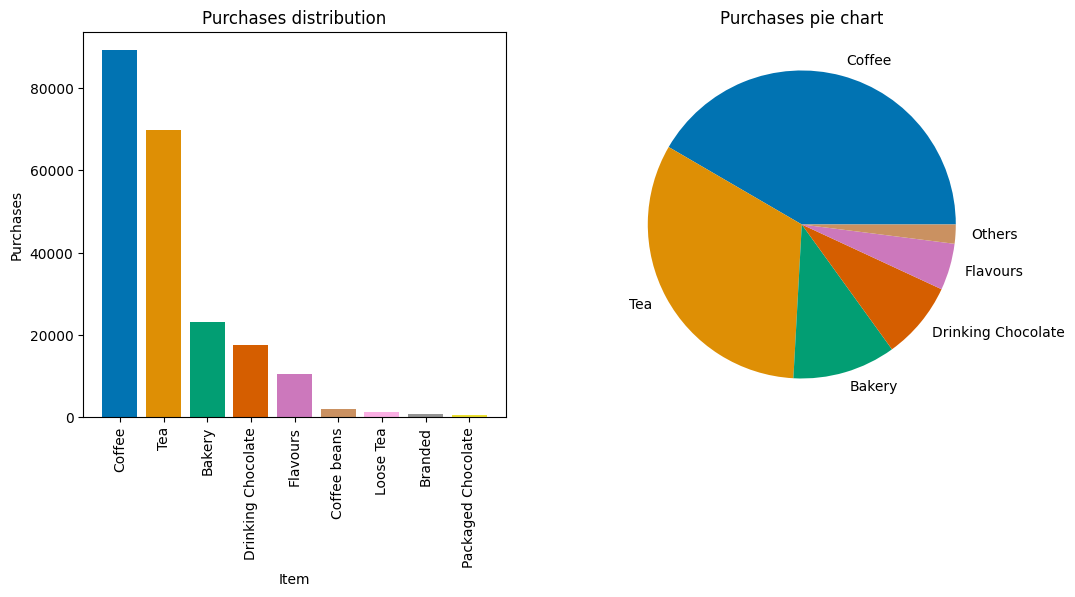

In [122]:
product_cat_distribution = data.groupby('product_category')['transaction_qty'].sum().sort_values(ascending=False)
colorblind_palette = sns.color_palette("colorblind")
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12,5))

ax0.bar(product_cat_distribution.index.values, product_cat_distribution, color=colorblind_palette)
ax0.set_xlabel('Item')
ax0.set_ylabel('Purchases')
ax0.set_title('Purchases distribution')
ax0.xaxis.set_tick_params(rotation=90)

# explode = (0.1, 0.1, 0.2, 0.2, 0.2, 1, 1, 1, 1)
threshold_pie = 1 * product_cat_distribution.sum() / 100
small_portions = product_cat_distribution[product_cat_distribution < threshold_pie]
others_value = small_portions.sum()

print(others_value / product_cat_distribution.sum())
print((product_cat_distribution['Coffee']+product_cat_distribution['Tea']) / product_cat_distribution.sum())

new_distrib = product_cat_distribution.drop(small_portions.index)
new_distrib['Others'] = others_value

ax1.pie(new_distrib.values, labels=new_distrib.index, colors=colorblind_palette)
ax1.set_title('Purchases pie chart')

plt.xticks(rotation=45)

### Insights
1. **Most Valuable Products**: With a first glance at the pie chart, we see that coffee and tea products lead to 74.13% of the purchasess. 
2. **Non-performing Items**: On the other side of the distribution, coffee beans, loose tea, branded items, and packaged chocolate only constitute 2.00% of the items sold.

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Flavours'),
  Text(1, 0, 'Coffee'),
  Text(2, 0, 'Tea'),
  Text(3, 0, 'Bakery'),
  Text(4, 0, 'Drinking Chocolate'),
  Text(5, 0, 'Packaged Chocolate'),
  Text(6, 0, 'Loose Tea'),
  Text(7, 0, 'Coffee beans'),
  Text(8, 0, 'Branded')])

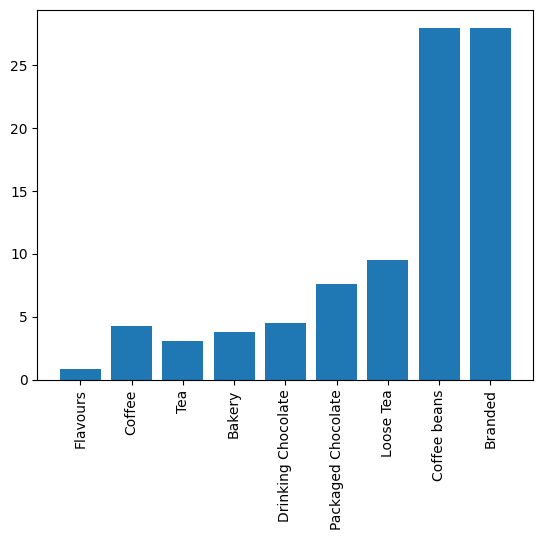

In [134]:
# product_cat_prices = data.groupby('product_category')['transaction_qty'].mean().sort_values(ascending=False)
product_cat_prices = data.drop_duplicates(subset='product_type').sort_values('unit_price', ascending=True)
plt.bar(product_cat_prices['product_category'], product_cat_prices['unit_price'])
plt.xticks(rotation=90)
# product_cat_prices.head()

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Flavours'),
  Text(1, 0, 'Coffee'),
  Text(2, 0, 'Tea'),
  Text(3, 0, 'Bakery'),
  Text(4, 0, 'Drinking Chocolate'),
  Text(5, 0, 'Packaged Chocolate'),
  Text(6, 0, 'Loose Tea'),
  Text(7, 0, 'Coffee beans'),
  Text(8, 0, 'Branded')])

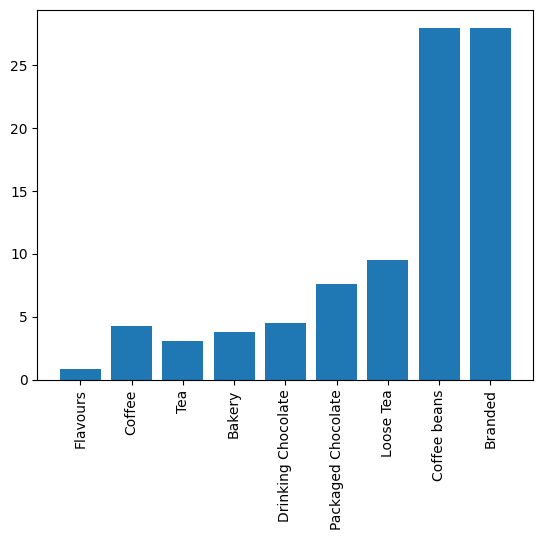

In [138]:
# product_cat_prices = data.groupby('product_category')['transaction_qty'].mean().sort_values(ascending=False)
product_cat_prices = data.drop_duplicates(subset='product_type').sort_values('unit_price', ascending=True)
product_cat_prices.head()

plt.bar(product_cat_prices['product_category'], product_cat_prices['unit_price'])
plt.xticks(rotation=90)
# product_cat_prices.head()